# First-order ODE: single-step methods

The solution process of an ODE is performed by steps. In a single-step approach, the solution of the following step depends on the current one. In a multiplestep method, the solution of the next step is calculated from several steps. A multiplestep approach is more accurate, you can think of a similar construct as the higher-order derivatives treated previously. 

For first order ODEs with the general form: 

$$
\frac{dy}{dx}=f(x,y)
$$

**One initial condition is needed to find only one solution!** Without it, there would be an infinite number of solutions possible. The initial condition is:

$$
y(x_0)=y_0
$$

# Explicit Euler

The simplest finite difference method is the explicit Euler. Although simple, it contains the basic characteristics as more advanced and accurate methods. It looks as:

$$
x_{i+1}=x_i+\Delta x 
$$
$$
y_{i+1}=y_i+\Delta x * slope \rvert_i
$$

where $\Delta x$ is the step size and the slope is a constant that approximates the rate of change of $y$ with respect to $x$ (a.k.a. the derivative) in the interval $x_i$ to $x_{i+1}$. The solution starts at $i=0$ given by the initial condition, then $i$ is increased to 1 where the values are calculated using the previous equations. This loop continues until the points cover the desired domain. **The computation of the slope is the key difference between single step methods. For explicit euler, the slope is computed with the values at the current step!** 


<img src="figs/explicit_euler.png" width=450px></img>



## Explicit Euler Example

Consider the following equation: 

$$
\frac{dy}{dx}= y'=-y
$$
We want to know the solution in the domain $[a=0,b=30]$. The **initial condition** is $y(x_0)=1$ and the step size is $\Delta x = 0.2$.

The discretization of the differential equation transforms the problem into an algebraic one. Following the formula of explicit Euler for the discretization yields: 

$$
y_{i+1}= y_i + \Delta x *y'_i
$$

In the following code, Explicit Euler is implemented.

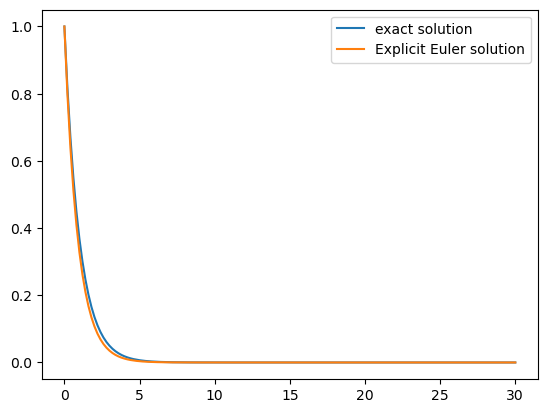

In [156]:
import numpy as np 
import matplotlib.pyplot as plt

dx = .2
x = np.arange(0,30+dx,dx)
y = np.zeros(len(x))

##-----------------------------
##Explicit Euler Implementation
##-----------------------------
alpha=1
y[0] = 1
for i in range(len(x)-1): 
    y[i+1] = y[i] + dx*( -alpha*y[i])
##------------------------------

y_exact = np.exp(-alpha*x)
plt.plot(x,y_exact)
plt.plot(x,y)
plt.legend(['exact solution','Explicit Euler solution'])


## Error analysis

There are two types of errors: round-off and truncation. The **round-off** error is due to the computer's limitation to represent a floating number (decimal). To illustrate it consider the following: the difference between 1 and 0.9 is 0.1, if you substract to 0.1 the value 0.1 you should obtain a value of 0, even if we accumulate 0 ten thousand times. The following code does exactly that but using floating numbers with varying precision. 

In [97]:
def accumulated_error(a,b,solution,iterations):
    error = solution - np.abs(a-b) 
    error_accumulated = 0
    for i in range(iterations):
        error_accumulated = error_accumulated + error

    return error_accumulated

print('Error using 16 bits of memory = ',accumulated_error(np.float16(1.),np.float16(0.9),np.float16(0.1),10000))
print('Error using 32 bits of memory = ',accumulated_error(np.float32(1.),np.float32(0.9),np.float32(0.1),10000))
print('Error using 64 bits of memory = ',accumulated_error(np.float64(1.),np.float64(0.9),np.float64(0.1),10000))


Error using 16 bits of memory =  -1.220703125
Error using 32 bits of memory =  -0.00022351741790771484
Error using 64 bits of memory =  2.7755575615628914e-13


As you can see, this simple operation can give discernible errors. Imagine a computation spanning 100 years with a time step of seconds and more complex operations: the round-off error will be present! As you can see, this can be reduced by increasing the precision or the number of digits used to represent numbers but be careful, this is not free as the memory the computer uses increases as well as the computation time. 

The truncation error is related to the method chosen for the slopes approximation. This can be obtained using our reliable TSE as this gives the exact solution. Therefore **the truncation error per step** is 

$$
\text{Truncation error }= y^{TSE}(x_{i+1}) - y^{\text{Explicit Euler}}(x_{i+1}) 
$$

$$
\text{Truncation error }= y(x_i)+\Delta x y'_i  +\frac{(\Delta x)^2}{2!} y''_i + ... - y(x_i)-\Delta x y'_i  \approx \mathcal{O}(\Delta x^2)
$$

The **total truncation error** accounts for the number of steps as: 

$$
\text{Total truncation error } \approx  \sum_{i=0}^{n-1} \frac{(\Delta x)^2}{2!} y''_i \approx \frac{(\Delta x)^2}{2!} \frac{b-a}{\Delta x} \bar{y}'' \approx \mathcal{O}(\Delta x) 
$$

In honor to this total accuracy, Explicit Euler is referred to as a first-order method.

## Stability

The error that is introduced in each step of the numerical solution ideally does not to increase as the solution advances. Under a well posed and proper solution, the error is expected to reduce with smaller steps. In some cases, the error increases without bound as the solution advances (even with smaller steps): **the solution becomes unstable**. The stability depends on the numerical method, the step size and the behavior of the differential equation. Therefore, the stability conditions will differ when applying the same numerical method to different equations. 

Let's consider the **stability for Explicit Euler** applied to a more general form of the problem above.  

$$
\frac{dy}{dx} = y'=-\alpha y
$$

With initial condition $y(0)=1$ and $\alpha>0$, the exact solution is:

$$
y^{\text{exact}}(x_{i})=y_0 e^{-\alpha x_{i}}
$$

The Explicit Euler equivalent is 

$$
y_{i+1}=y_{i}-\alpha y_i \Delta x=y_i(1-\alpha \Delta x)
$$

Following the initial steps of the numerical solution a pattern arises:

$$
y_{1}=y_0(1-\alpha \Delta x)
$$

$$
y_{2}=y_1(1-\alpha \Delta x) =y_0(1-\alpha \Delta x)^2 
$$

$$
y_{3}=y_2(1-\alpha \Delta x) =y_0(1-\alpha \Delta x)^3 
$$

$$
y_{n}=y_0(1-\alpha \Delta x)^n 
$$


Comparing this last equation with the exact solution, it can be seen that the term $(1-\alpha \Delta x)^n$ in the numerical solution is approximating the term $e^{-\alpha \Delta x_i}$ in the exact solution. The latter tends to decay with larger values of $x_i$ and positive $\alpha$. To make sure that the term $(1-\alpha \Delta x)^n$ decays with larger $n$ values $1-\alpha \Delta x$ should be less than $|1|$, i.e.,

$$
|1-\alpha \Delta x| < 1 \implies 0 < \alpha \Delta x < 2
$$

This is the stability criterion. If not complied, then the solution will be unstable. It is said that **Explicit Euler is conditionally stable! This is true for every explicit numerical method.** 



```{note}
EXERCISE:

What is the step size at which the problem described in the code above becomes unstable? Change $\Delta x$ accordingly and also test larger steps.
```

# Implicit Euler



Just as Euler's Explicit method is the simplest Explicit method, **Euler's implicit method is the simplest implicit method**. They look very similar but the slope is computed at the next step! That's where the implicit term comes from: the slope depends on the uknown value.

$$
x_{i+1}=x_i+\Delta x 
$$
$$
y_{i+1}=y_i+\Delta x * slope \rvert_{i+1}=y_i+\Delta x * y'_{i+1}
$$

Let's consider the same problem as before: 

$$
\frac{dy}{dx}= y'=-\alpha y
$$
We want to know the solution in the domain $[a=0,b=30]$. The **initial condition** is $y(x_0)=1$ and the step size is $\Delta x = 0.2$.

The discretization of the differential equation transforms the problem into an algebraic one. Following the formula of implicit Euler, the discretization yields: 

$$
y_{i+1}= y_i - \Delta x*\alpha*y_{i+1}
$$

then

$$
y_{i+1}+ \Delta x *\alpha*y_{i+1} = y_i  
$$

finally

$$
y_{i+1}= y_i/(1+\Delta x*\alpha)  
$$


In the following code, Implicit Euler is implemented.

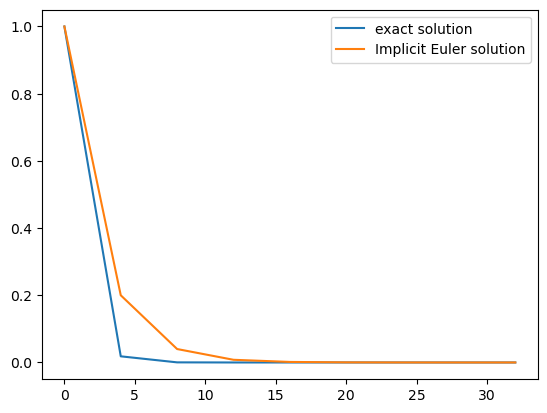

In [157]:
dx = 4
x = np.arange(0,30+dx,dx)
y = np.zeros(len(x))

##-----------------------------
##Implicit Euler Implementation
##-----------------------------
alpha=1
y[0] = 1
for i in range(len(x)-1): 
    y[i+1] = y[i]/(1+dx*alpha)
##------------------------------

y_exact = np.exp(-alpha*x)
plt.plot(x,y_exact)
plt.plot(x,y)
plt.legend(['exact solution','Implicit Euler solution'])

You can see that the result is similar to Explicit Euler, except that the curve for implicit Euler is slightly above than the exact solution. This makes sense as the derivative is taken to be in fron, so the slope is initially underestimated while the explicit solution initially overestimated the slope. 

The round-off errors and truncation error are similar. Implicit Euler is also a first-order method. But what about the stability? 


```{note}
EXERCISE:

Modify the step size in the Implicit Euler code, try to make the solution unstable. Do you notice something unexpected?
```

Let's understand what happens by following the same procedure as for the stability analysis of Explicit Euler.  

The exact solution is the same:
$$
y^{\text{exact}}(x_{i})=y_0 e^{-\alpha x_{i}}
$$


For the numerical solution, the numerical solution pattern is slightly different:

$$
y_{1}=y_0\left(\frac{1}{1+\alpha \Delta x}\right)
$$

$$
y_{2}=y_1\left(\frac{1}{1+\alpha \Delta x}\right) =y_0\left(\frac{1}{1+\alpha \Delta x}\right)^2
$$

$$
y_{3}=y_2\left(\frac{1}{1+\alpha \Delta x}\right) =y_0\left(\frac{1}{1+\alpha \Delta x}\right)^3
$$

$$
y_{n}=y_0\left(\frac{1}{1+\alpha \Delta x}\right)^n
$$

This last term to the power $n$ approximates the decaying exponential in the exact solution, just like in the Explicit Euler method. Here, the only condition that must be satisfied for stability is

$$\left|\frac{1}{1+\alpha h}\right| < 1$$

As $\alpha$ is positive and the step must be larger than 0, the stability criterion is always true. Hence, **an implicit Backward Euler scheme is unconditionally stable.** This is also the case for more advanced implicit schemes.

# Nonlinear ODE 

In the previous example, the explicit and implicit implementation seem to only differ in the formulation. However, this changes when treating non-linear equations. Let's see an example to identify the "impliciteness".

A certain polutant $p$ decays over time at a rate proportional to its concentration to the power $3/2$. There is a second mechanism that produces $p$ in time and scales with $p_{cst}=1000$, $cst$ indicates a constant: 

$$
\frac{dp(t)}{dt} = -p^{3/2} + 5*p_{cst}(1-e^{-t})
$$

where $p(t)$ is the polutant concentration in time. The initial concentration is also $p(t=0)=p_0=1000$. Solve the equation from $t=0$ until $t=0.5$ with a time step $\Delta t=0.002\text{ s}$. Use first explicit Euler and then implicit Euler.   

The expression for Explicit Euler becomes:

$$
    p_{i+1} = p_i + \Delta t \left ( -p_i^{3/2} + 5p_{cst}*(1-e^{-t_i}) \right )
$$

The algorithm to solve Explicit Euler is exactly the same as before.


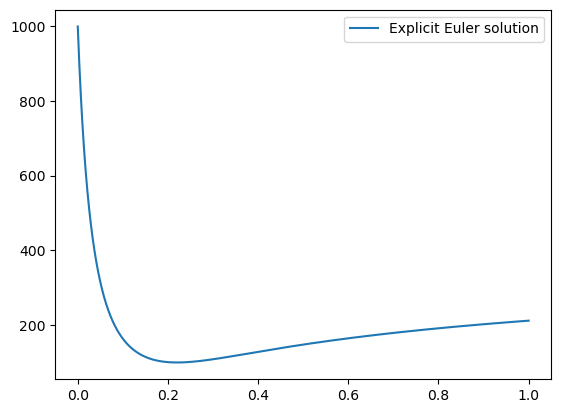

In [63]:
import numpy as np 
import matplotlib.pyplot as plt

dt = 0.0002
t = np.arange(0,1+dt,dt)
p = np.zeros(len(t))

##-----------------------------
##Explicit Euler Implementation
##-----------------------------
p_cst = 1000
p[0] = p_cst
for i in range(len(t)-1): 
    p[i+1] = p[i] + dt*( -p[i]**(3/2) + 5*p_cst*(1-np.exp(-t[i])))
##------------------------------

plt.plot(t,n)
plt.legend(['Explicit Euler solution'])

Now, using Implicit Euler, the expression becomes:

$$
    p_{i+1} = p_i + \Delta t \left ( -p_{i+1}^{3/2} + 5p_{cst}*(1-e^{-t_{i+1}}) \right )
$$

Obtaining the solution requires a different procedure because now the unknown $p_{i+1}$ appears in both sides of the equation and cannot be solved directly instead an iterative procedure is needed! For example, a widely use method like Newton Rhapson.

## Newton-Raphson Method

In the Observation Theory week, you used Gauss-Newton to solve a non-linear least square problem. That method is actually an extension of the Newton-Rhapson method. Here, it is described with an emphasis in the tricky aspects. Also, the algorithm is summarized and its main advantages and disadvantages are mentioned.

Think of a function $g(z)=0$. Its solution is graphically represented as the intersection of $g(z)$ with the $z$ axis (see the Figure below). Numerically that solution can be found by selecting an initial guess $z_0$, estimating the tangent (slope) $g'(z_0)$ and finding its intersection with the $z$ axis, which indicates the value $z_1$. Now, the solution is closer. We repeat this process to find $z_2$ but now the guess is $z_1$. The process is repeated until the value $g(z_*)$ is very small: $|g(z_*)<\epsilon|$. Here, $\epsilon$ is the tolerance e.g., $\epsilon=10^{-6}$ (see the red square in the Figure below).

<img src="figs/newton-rhapson.png" width=350px></img>


### Some remarks:


Finding the point $z_{j+1}$ where the tangent crosses the $z$-axis is done following an approximation of first order of $g'(z_j)$:

$$
g'(z_{j}) = \frac{g(z_j)-0}{z_{j}-z_{j+1}}
$$

solving for $z_{j+1}$ gives the expression

$$
z_{j+1} = z_j - \frac{g(z_j)}{g'(z_j)}.
$$

Look at the Implicit Euler approximation of the pollutant problem. We can rewrite it to be g(z)=q(p_{i+1})=0 as follows:

$$
    p_{i+1} - p_i - \Delta t \left ( -p_{i+1}^{3/2} + 5p_{cst}*(1-e^{-t_{i+1}}) \right ) = 0
$$

and g'(z)=q'(p_{i+1}) is its derivative:

$$
    g'(z)=q'(p_{i+1}) = 1 + \frac{3}{2} \Delta t  p_{i+1}^{1/2}  
$$

Finally, the expression used to iterate is

$$
p_{i+1,j+1} = p_{i+1,j} - \frac{p_{i+1,j} - p_i - \Delta t \left ( -p_{i+1,j}^{3/2} + 5p_{cst}*(1-e^{-t_{i+1}}) \right )}{1 + \frac{3}{2} \Delta t  p_{i+1,j}^{1/2}}
$$

where $p{i+1,j}$ when $j=0$ is the initial guess! The solution is found and the iteration stops at $j=m$, once $|g(z)=q(p_{i+1},m)|<\epsilon$. 

**The Newton-Raphson method:**

- Converges quickly and can provide highly accurate approximations.

- It can be used for both real and complex roots.

**But the method also has its limitations:**

- It may not converge if the initial guess is far from the actual value or if the function is discontinuous near the value.

- The derivative of the function is needed, which may not always be known.
